In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

: 

In [ ]:
order = pd.read_csv('../sorted_inno_sp.csv')
order = order.rename(columns = {'VGL ID':'sp2'})
order.head()

: 

In [4]:
df = pd.read_csv('../chrom_int_anno.csv')
df['file_name'] = '../chrom_int/'+df['chrom'].astype(str)+'_'+df['start'].astype(str)+'.tsv'
df

,start,cons,inno,non_inno,REF_inno,ALT_noninno,n_inno,n_noninno,n_all,inno_N,inno_-,noninno_N,noninno_-,chrom,file_name
0,116362,False,False,False,T,"T,C",7.0,25.0,32.0,0.0,1.0,0.0,4.0,NC_044211.2,../chrom_int/NC_044211.2_116362.tsv
1,123675,False,False,False,"A,T,C","T,C",8.0,29.0,37.0,0.0,0.0,0.0,0.0,NC_044211.2,../chrom_int/NC_044211.2_123675.tsv
2,154944,False,False,False,"G,C","T,G,C",7.0,26.0,33.0,0.0,1.0,0.0,1.0,NC_044211.2,../chrom_int/NC_044211.2_154944.tsv
3,231620,False,False,False,"A,T,G","A,G,C",6.0,26.0,32.0,0.0,2.0,0.0,3.0,NC_044211.2,../chrom_int/NC_044211.2_231620.tsv
4,329838,False,False,False,"T,C","T,G,C",8.0,21.0,29.0,0.0,0.0,0.0,2.0,NC_044211.2,../chrom_int/NC_044211.2_329838.tsv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,17472611,False,False,False,C,"A,T,C",5.0,23.0,28.0,0.0,0.0,0.0,3.0,NC_045028.1,../chrom_int/NC_045028.1_17472611.tsv
6886,17596378,False,False,False,"T,C","T,G,C",6.0,13.0,19.0,0.0,1.0,0.0,0.0,NC_045028.1,../chrom_int/NC_045028.1_17596378.tsv
6887,18840446,False,False,False,C,"T,G,C",6.0,23.0,29.0,0.0,0.0,0.0,1.0,NC_045028.1,../chrom_int/NC_045028.1_18840446.tsv
6888,20149476,False,False,False,G,"A,G",5.0,27.0,32.0,0.0,2.0,0.0,0.0,NC_045028.1,../chrom_int/NC_045028.1_20149476.tsv


In [291]:
# idx = df[(df['cons']==True) | (df['inno']==True) | (df['non_inno']==True)].index

In [292]:
# for i in idx:
#     file_name = '../chrom_int/{}_{}.tsv'.format(df.iloc[i]['chrom'], df.iloc[i]['start'])

#     df_sp = pd.read_csv(file_name, sep = '\t')
#     df_sp['sp2'] = df_sp['sp'].apply(lambda x: x.split('_')[1])
#     df_for_plot = order.merge(df_sp, on = 'sp2')
#     df_for_plot = df_for_plot[df_for_plot['canon']!='-']
    
#     sns.scatterplot(data=df_for_plot, x="TotInno_resResEff2022", y="canon", hue="canon")
#     plt.plot([0.5, 0.5], [0,2], 'r', linestyle='dashed')
#     plt.show()

In [5]:
def get_continue(file_name):
    

    df_sp = pd.read_csv(file_name, sep = '\t')
    df_sp['sp2'] = df_sp['sp'].apply(lambda x: x.split('_')[1])
    df_for_plot = order.merge(df_sp, on = 'sp2')
    df_for_plot = df_for_plot[df_for_plot['canon']!='-']
    
    
    ans = dict()

    last = 0
    for i in df_for_plot['canon']:

        if last == 0:
            ans[i] = 1
            last = i

        if i in ans and last==i:
            ans[i]+=1
            last = i

        if last!=i and i not in ans:
            ans[i] = 1
            last = i

        if last!=i and i in ans:
            ans['2'+i] = 1
            last = i
    ans = [i for i in ans.keys() if i.startswith('2')]
    if len(ans)==0:
        
        print(file_name)
        sns.scatterplot(data=df_for_plot, x="TotInno_resResEff2022", y="canon", hue="canon")
        plt.plot([0.5, 0.5], [0,2], 'r', linestyle='dashed')
        plt.show()
        return True
    else:
        return False
    
#get_continue(df)

../chrom_int/NC_044212.2_20911096.tsv


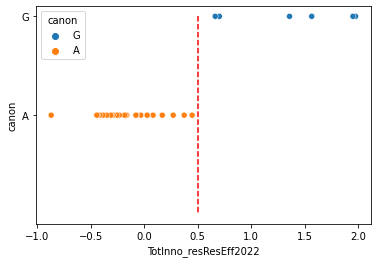

../chrom_int/NC_044212.2_24214881.tsv


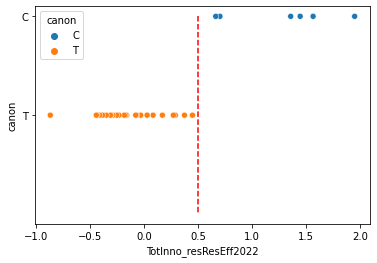

../chrom_int/NC_044214.2_94030014.tsv


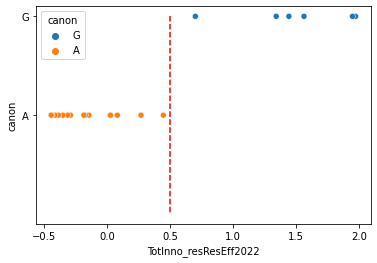

../chrom_int/NC_044215.2_24953527.tsv


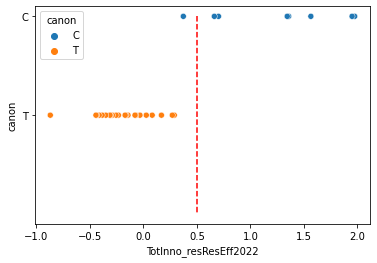

../chrom_int/NC_044217.2_29190824.tsv


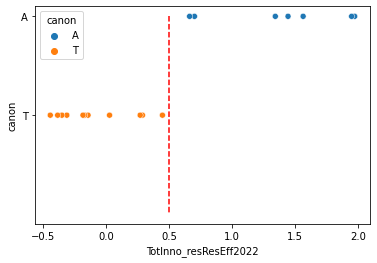

../chrom_int/NC_044231.2_1069474.tsv


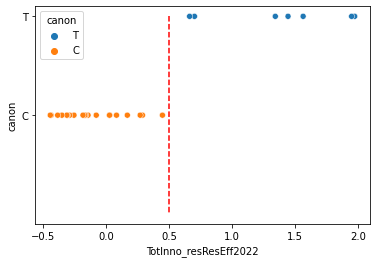

../chrom_int/NC_044233.2_4542996.tsv


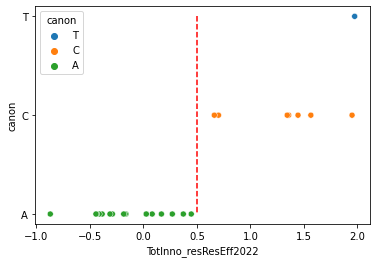

In [5]:
df['tt'] = df['file_name'].apply(lambda x: get_continue(x))

In [6]:
df_true = df[df['tt']==True]
df_true

,start,cons,inno,non_inno,REF_inno,ALT_noninno,n_inno,n_noninno,n_all,inno_N,inno_-,noninno_N,noninno_-,chrom,file_name,tt
829,20911096,True,False,False,G,A,6.0,27.0,33.0,0.0,2.0,0.0,1.0,NC_044212.2,../chrom_int/NC_044212.2_20911096.tsv,True
855,24214881,False,True,False,C,"A,T",6.0,28.0,34.0,0.0,1.0,0.0,1.0,NC_044212.2,../chrom_int/NC_044212.2_24214881.tsv,True
2548,94030014,True,False,False,G,A,6.0,15.0,21.0,0.0,1.0,0.0,3.0,NC_044214.2,../chrom_int/NC_044214.2_94030014.tsv,True
2808,24953527,False,False,False,C,"T,C",7.0,26.0,33.0,0.0,1.0,0.0,2.0,NC_044215.2,../chrom_int/NC_044215.2_24953527.tsv,True
3500,29190824,True,False,False,A,T,7.0,11.0,18.0,0.0,0.0,0.0,0.0,NC_044217.2,../chrom_int/NC_044217.2_29190824.tsv,True
5712,1069474,True,False,False,T,C,7.0,21.0,28.0,0.0,0.0,0.0,5.0,NC_044231.2,../chrom_int/NC_044231.2_1069474.tsv,True
5960,4542996,False,False,True,"T,C",A,8.0,20.0,28.0,0.0,0.0,0.0,5.0,NC_044233.2,../chrom_int/NC_044233.2_4542996.tsv,True


In [7]:
import gffpandas.gffpandas as gffpd

import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import gseapy as gp
import warnings

import numpy as np
from gseapy.plot import barplot, dotplot
from matplotlib import pyplot as plt 


warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
path_to_data = '../'

In [8]:
annotation = gffpd.read_gff3('{}/{}'.format(path_to_data, 'GCF_003957565.2_bTaeGut1.4.pri_genomic.gff'))
print(annotation.header)

##gff-version 3
#!gff-spec-version 1.21
#!processor NCBI annotwriter
#!genome-build bTaeGut1.4.pri
#!genome-build-accession NCBI_Assembly:GCF_003957565.2
#!annotation-source NCBI Taeniopygia guttata Annotation Release 106
##sequence-region NC_044211.2 1 114020016
##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=59729



In [9]:
df_ori = annotation.df
df_ori['chrom']=df_ori['seq_id']
df_ = df_ori[df_ori['type']=='gene']
df_['element_ID'] = df_['attributes'].apply(lambda x: x.split(';')[0].split('=')[1].split('-')[1])
background = df_['element_ID'].tolist()
len(background)

21732

In [10]:
def get_genes(df_true):
    genelists = []
    cons_in_table = ['cons','inno','non_inno']

    df2 = df_true

    #df2 = df2[df2['start']!='start']
    df2['start'] = df2['start']+1 
    df3 = df2
    matched_list = []

    for chrom in df3['chrom'].unique():
        df3_chrom = df3[df3['chrom']== chrom]
        df_chrom = df_[df_['chrom']==chrom]

        for i in df3_chrom.index:
            df_small = df_chrom[(df_chrom['start']<=df3_chrom.loc[i]['start'])
                                         &(df_chrom['end']>=df3_chrom.loc[i]['start'])]
            df_small['coord'] = int(df3_chrom.loc[i]['start'])
            df_small['coord'] = int(df3_chrom.loc[i]['start'])
            df_small['coord'] = df_small['coord'] - 1
            matched_list.append(df_small)
    df_genes = pd.concat(matched_list)

    df_genes['element_ID'] = df_genes['attributes'].apply(lambda x: x.split(';')[0].split('=')[1].split('-')[1])
    return df_genes

get_genes(df_true)

,seq_id,source,type,start,end,score,strand,phase,attributes,chrom,element_ID,coord
118716,NC_044212.2,Gnomon,gene,20872681,20928308,.,+,.,ID=gene-POT1;Dbxref=GeneID:100228967;Name=POT1...,NC_044212.2,POT1,20911096
122704,NC_044212.2,Gnomon,gene,24209740,24229025,.,+,.,ID=gene-LOC121468148;Dbxref=GeneID:121468148;N...,NC_044212.2,LOC121468148,24214881
392434,NC_044214.2,Gnomon,gene,94028581,94063814,.,-,.,ID=gene-CAPN14;Dbxref=GeneID:100232506;Name=CA...,NC_044214.2,CAPN14,94030014
430654,NC_044215.2,Gnomon,gene,24926306,25012701,.,+,.,ID=gene-LOC115494957;Dbxref=GeneID:115494957;N...,NC_044215.2,LOC115494957,24953527
551439,NC_044217.2,Gnomon,gene,29163500,29214118,.,+,.,ID=gene-PLEKHH1;Dbxref=GeneID:100232510;Name=P...,NC_044217.2,PLEKHH1,29190824
1019250,NC_044231.2,Gnomon,gene,1057611,1079110,.,-,.,ID=gene-CUEDC1;Dbxref=GeneID:100228984;Name=CU...,NC_044231.2,CUEDC1,1069474
1069071,NC_044233.2,Gnomon,gene,4472537,4567680,.,-,.,ID=gene-VPS13D;Dbxref=GeneID:100224544;Name=VP...,NC_044233.2,VPS13D,4542996


In [11]:
def get_continue2(file_name):
    

    df_sp = pd.read_csv(file_name, sep = '\t')
    df_sp['sp2'] = df_sp['sp'].apply(lambda x: x.split('_')[1])
    df_for_plot = order.merge(df_sp, on = 'sp2')
    df_for_plot = df_for_plot[df_for_plot['canon']!='-']
    
    
    ans = dict()

    last = 0
    for i in df_for_plot['canon']:

        if last == 0:
            ans[i] = 1
            last = i

        if i in ans and last==i:
            ans[i]+=1
            last = i

        if last!=i and i not in ans:
            ans[i] = 1
            last = i

        if last!=i and i in ans:
            ans['2'+i] = 1
            last = i
    ans = [i for i in ans.keys() if i.startswith('2')]
    if len(ans)==0:
        
        print(file_name)
        sns.scatterplot(data=df_for_plot, x="TotInno_resResEff2022", y="canon", hue="canon")
        plt.plot([0.5, 0.5], [0,2], 'r', linestyle='dashed')
        plt.show()
        return True
    else:
        return False

In [12]:
 df['file_name'][:10].apply(lambda x: get_continue(x))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: file_name, dtype: bool

In [13]:
sp_non_inno = [i.split('_')[2].split('.')[0] for i in 
"""
GCF_003957565.2_bTaeGut1.4.pri,
GCA_008658365.1_bAlcTor1_primary,
GCA_014839755.1_bSylBor1.pri,
GCA_009769605.1_bBucAby1.pri""".split()]
sp_inno = '''bGeoTri1
bSteHir1
bSylAtr1
bAquChr1'''.split()
sp_inno

['bGeoTri1', 'bSteHir1', 'bSylAtr1', 'bAquChr1']

In [6]:
def get_continue2(df, i):
    

    
    file_name = '../chrom_int/{}_{}.tsv'.format(df.iloc[i]['chrom'], df.iloc[i]['start'])

    df_sp = pd.read_csv(file_name, sep = '\t')
    df_sp['sp2'] = df_sp['sp'].apply(lambda x: x.split('_')[1])
    df_for_plot = order.merge(df_sp, on = 'sp2')
    df_for_plot =  df_for_plot[(df_for_plot['canon']!='-')]#&(df_for_plot['canon']!='N')]
    
    non_inno_let = list(df_for_plot[df_for_plot['sp2'].apply(lambda x: x in sp_non_inno)]['canon'].unique())
    inno_let = list(df_for_plot[df_for_plot['sp2'].apply(lambda x: x in sp_inno)]['canon'].unique())
    
    if 'N' in non_inno_let:
        non_inno_let.remove('N')
    if 'N' in inno_let:
        inno_let.remove('N')
    
    canon = []
    if len(non_inno_let)==1:
        canon.append(non_inno_let[0])
    if len(inno_let)==1:
        canon.append(inno_let[0])
        
    
    ans = dict()

    last = 0
    firstt = df_for_plot['canon'].tolist()[0]
    lastt = df_for_plot['canon'].tolist()[-1]
    
    for letter in df_for_plot['canon']:

        if last == 0:
            ans[letter] = 1
            last = letter

        if i in ans and last==letter:
            ans[letter]+=1
            last = letter

        if last!=letter and letter not in ans:
            ans[letter] = 1
            last = letter

        if last!=letter and letter in ans:
            if letter in canon:
                ans['2'+letter] = 1
            elif letter not in canon:
                ans[letter]+=1
            last = letter
    ans2 = [j for j in ans.keys() if j.startswith('2')]
    
    if len(ans2)==0 and firstt!=lastt:
        sns.scatterplot(data=df_for_plot, x="TotInno_resResEff2022", y="canon", hue="canon")
        plt.plot([0.5, 0.5], [0,4], 'r', linestyle='dashed')

        print(file_name)
        plt.show()
        
        return True
    else:
        return False
    
i=1
get_continue2(df, i)

NameError: name 'i' is not defined

In [1]:
ansv = []
for i in df.index:
    ansv.append(get_continue2(df, i))

NameError: name 'df' is not defined

In [17]:
df['filter_2'] = pd.Series(ansv)
df_true_2 = df[df['filter_2']==True]

get_genes(df_true_2)#.to_csv('../filtered_genes_38.csv', index = False)

,seq_id,source,type,start,end,score,strand,phase,attributes,chrom,element_ID,coord
118716,NC_044212.2,Gnomon,gene,20872681,20928308,.,+,.,ID=gene-POT1;Dbxref=GeneID:100228967;Name=POT1...,NC_044212.2,POT1,20911096
122704,NC_044212.2,Gnomon,gene,24209740,24229025,.,+,.,ID=gene-LOC121468148;Dbxref=GeneID:121468148;N...,NC_044212.2,LOC121468148,24214881
282513,NC_044213.2,Gnomon,gene,134687156,135260640,.,-,.,ID=gene-CSMD3;Dbxref=GeneID:100232667;Name=CSM...,NC_044213.2,CSMD3,135115429
302951,NC_044214.2,Gnomon,gene,5424447,5640261,.,+,.,ID=gene-RUNX2;Dbxref=GeneID:100222668;Name=RUN...,NC_044214.2,RUNX2,5491736
317361,NC_044214.2,Gnomon,gene,25939415,25980658,.,-,.,ID=gene-LGSN;Dbxref=GeneID:100231690;Name=LGSN...,NC_044214.2,LGSN,25976307
343773,NC_044214.2,Gnomon,gene,56242016,56253492,.,-,.,ID=gene-PNLDC1;Dbxref=GeneID:100225677;Name=PN...,NC_044214.2,PNLDC1,56243393
374229,NC_044214.2,Gnomon,gene,81277209,81382217,.,-,.,ID=gene-SDCCAG8;Dbxref=GeneID:100232168;Name=S...,NC_044214.2,SDCCAG8,81331365
392434,NC_044214.2,Gnomon,gene,94028581,94063814,.,-,.,ID=gene-CAPN14;Dbxref=GeneID:100232506;Name=CA...,NC_044214.2,CAPN14,94030014
430654,NC_044215.2,Gnomon,gene,24926306,25012701,.,+,.,ID=gene-LOC115494957;Dbxref=GeneID:115494957;N...,NC_044215.2,LOC115494957,24953527
474131,NC_044215.2,Gnomon,gene,65682239,65866058,.,-,.,ID=gene-ANK2;Dbxref=GeneID:751974;Name=ANK2;gb...,NC_044215.2,ANK2,65800661


In [20]:
df_true_2.to_csv('../filtered_pos_38.csv', index = False)